In [2]:
import gym
import numpy as np
import random
from os import system, name
from time import sleep
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
# Define function to clear console window.
import seaborn as sns; sns.set_theme()
def clear(): 
  
    # Clear on Windows.
    if name == 'nt': 
        _ = system('cls')
  
    # Clear on Mac and Linux. (os.name is 'posix') 
    else: 
        _ = system('clear')

clear()




In [3]:
"""Import libraries"""
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
from time import sleep
from matplotlib import animation

In [4]:
# CREATE THE ENVIRONMENT
"""Setup"""

env = gym.make("Taxi-v3").env # Setup the Gym Environment

In [5]:
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        # Print console output
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")

        # Pauze animation
        sleep(time_lag)

In [6]:
def store_episode_as_gif(experience_buffer, path='./', filename='tax_3.gif'):
    """Store episode as gif animation"""
    fps = 5   # Set framew per seconds
    dpi = 30  # Set dots per inch
    interval = 50  # Interval between frames (in ms)

    # Retrieve frames from experience buffer
    frames = []
    for experience in experience_buffer:
        frames.append(experience['frame'])

    # Fix frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    # Generate animation
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=interval)

    # Save output as gif
    anim.save(path + filename, writer='imagemagick', fps=fps)

State space: Discrete(500)
Action space: Discrete(6)
State: 483
Action: 3
Action mask: [0 1 0 1 0 0]
Reward: -1


/home/iagaraev/Packages/myenv2/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


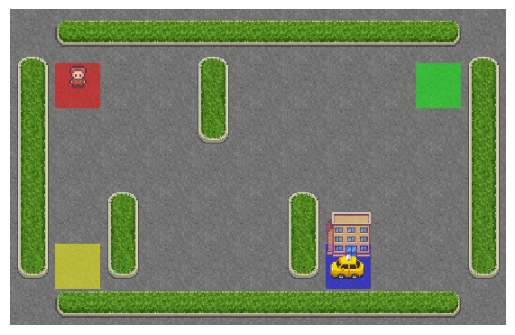

In [7]:
"""Initialize and validate the environment"""
env = gym.make("Taxi-v3", render_mode="rgb_array").env
state, _ = env.reset()

# Print dimensions of state and action space
print("State space: {}".format(env.observation_space))
print("Action space: {}".format(env.action_space))

# Sample random action
action = env.action_space.sample(env.action_mask(state))
next_state, reward, done, _, _ = env.step(action)

# Print output
print("State: {}".format(state))
print("Action: {}".format(action))
print("Action mask: {}".format(env.action_mask(state)))
print("Reward: {}".format(reward))

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [8]:
print(env.action_space)
print(env.observation_space)

Discrete(6)
Discrete(500)


    
    The Taxi Problem
    from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition"
    by Tom Dietterich
    
    Description:
    There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.
    
    Observations:
    There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations. 
    
    Passenger locations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
    - 4: in taxi
    
    Destinations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
    
    Actions:
    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger
    
    Rewards:
    There is a default per-step reward of -1,
    except for delivering the passenger, which is +20,
    or executing "pickup" and "drop-off" actions illegally, which is -10.
    
    Rendering:
    - blue: passenger
    - magenta: destination
    - yellow: empty taxi
    - green: full taxi
    - other letters (R, G, Y and B): locations for passengers and destinations
    
    
    state space is represented by:
        (taxi_row, taxi_col, passenger_location, destination)
   

In [9]:
#env.P

###  INITIALISE Q TABLE TO ZERO

In [10]:
# Make a new matrix filled with zeros.
# The matrix will be 500x6 as there are 500 states and 6 actions.
Q = np.zeros([env.observation_space.n, env.action_space.n])


### HYPERPARAMETERS

In [11]:

training_episodes = 20000   # Amount of times to run environment while training.
test_episodes = 100         # Total test episodes
display_episodes = 10       # Amount of times to run environment after training.

max_steps = 50              # Max steps per episode

alpha = 0.15 # Learning Rate
gamma = 0.6  # Discount Rate


### EXPLORATION / EXPLOITATION PARAMETERS

In [12]:
epsilon = 1                   # Exploration rate
max_epsilon = 1               # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Training the Agent , Q - LEARNING 

In [13]:

# TRAINING PHASE
training_rewards = []   # list of rewards
all_penalties = []
all_epochs = []

for episode in range(training_episodes):
    state = env.reset()[0]    # Reset the environment
    cumulative_training_rewards = 0
    penalties = 0 
    
    steps =0 
    
    for step in range(max_steps):
        steps = step
        
        # Choose an action (a) among the possible states (s)
        exp_exp_tradeoff = random.uniform(0, 1)   # choose a random number
        
        # If this number > epsilon, select the action corresponding to the biggest Q value for this state (Exploitation)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])        
        # Else choose a random action (Exploration)
        else:
            action = env.action_space.sample()
        
        # Perform the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, inf,_ = env.step(action)

        # Update the Q table using the Bellman equation: Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action]) 
        cumulative_training_rewards += reward  # increment the cumulative reward        
        state = new_state         # Update the state
        
        if reward == -10: # Checks if agent attempted to do an illegal action.
            penalties += 1
       
        # If we reach the end of the episode
        if done == True:
            #print ("Cumulative reward for episode {}: {}".format(episode, cumulative_training_rewards))
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    # append the episode cumulative reward to the list
    training_rewards.append(cumulative_training_rewards)
    
    all_penalties.append(penalties)
    
    all_epochs.append(steps) 
    


Cumulative reward for episode 3379: -1
Cumulative reward for episode 3380: 6
Cumulative reward for episode 3381: 8
Cumulative reward for episode 3382: 9
Cumulative reward for episode 3383: 4
Cumulative reward for episode 3384: 8
Cumulative reward for episode 3385: 7
Cumulative reward for episode 3386: 11
Cumulative reward for episode 3387: 4
Cumulative reward for episode 3388: -1
Cumulative reward for episode 3389: 9
Cumulative reward for episode 3390: 12
Cumulative reward for episode 3391: 5
Cumulative reward for episode 3392: 8
Cumulative reward for episode 3393: 9
Cumulative reward for episode 3394: 9
Cumulative reward for episode 3395: 11
Cumulative reward for episode 3396: 8
Cumulative reward for episode 3397: 11
Cumulative reward for episode 3398: -3
Cumulative reward for episode 3399: -2
Cumulative reward for episode 3400: 6
Cumulative reward for episode 3401: 8
Cumulative reward for episode 3402: 6
Cumulative reward for episode 3403: 10
Cumulative reward for episode 3404: 8
Cum

Cumulative reward for episode 3857: 4
Cumulative reward for episode 3858: -1
Cumulative reward for episode 3859: 3
Cumulative reward for episode 3860: 6
Cumulative reward for episode 3861: 13
Cumulative reward for episode 3862: -1
Cumulative reward for episode 3863: 10
Cumulative reward for episode 3864: 6
Cumulative reward for episode 3865: 0
Cumulative reward for episode 3866: 5
Cumulative reward for episode 3867: 11
Cumulative reward for episode 3868: 4
Cumulative reward for episode 3869: 11
Cumulative reward for episode 3870: -2
Cumulative reward for episode 3871: 9
Cumulative reward for episode 3872: 15
Cumulative reward for episode 3873: 10
Cumulative reward for episode 3874: 9
Cumulative reward for episode 3875: 5
Cumulative reward for episode 3876: 11
Cumulative reward for episode 3877: 6
Cumulative reward for episode 3878: -2
Cumulative reward for episode 3879: 4
Cumulative reward for episode 3880: 9
Cumulative reward for episode 3881: -2
Cumulative reward for episode 3882: 8


Cumulative reward for episode 4311: 11
Cumulative reward for episode 4312: 7
Cumulative reward for episode 4313: -2
Cumulative reward for episode 4314: 7
Cumulative reward for episode 4315: 4
Cumulative reward for episode 4316: 2
Cumulative reward for episode 4317: 5
Cumulative reward for episode 4318: -8
Cumulative reward for episode 4319: 13
Cumulative reward for episode 4320: 11
Cumulative reward for episode 4321: -3
Cumulative reward for episode 4322: 4
Cumulative reward for episode 4323: 10
Cumulative reward for episode 4324: -3
Cumulative reward for episode 4325: 7
Cumulative reward for episode 4326: 8
Cumulative reward for episode 4327: 2
Cumulative reward for episode 4328: 6
Cumulative reward for episode 4329: 1
Cumulative reward for episode 4330: 12
Cumulative reward for episode 4331: 8
Cumulative reward for episode 4332: 7
Cumulative reward for episode 4333: 12
Cumulative reward for episode 4334: 9
Cumulative reward for episode 4335: 0
Cumulative reward for episode 4336: 6
Cu

Cumulative reward for episode 4693: 13
Cumulative reward for episode 4694: 9
Cumulative reward for episode 4695: 4
Cumulative reward for episode 4696: 11
Cumulative reward for episode 4697: 11
Cumulative reward for episode 4698: 0
Cumulative reward for episode 4699: 9
Cumulative reward for episode 4700: 8
Cumulative reward for episode 4701: 6
Cumulative reward for episode 4702: 12
Cumulative reward for episode 4703: 8
Cumulative reward for episode 4704: 8
Cumulative reward for episode 4705: 5
Cumulative reward for episode 4706: 11
Cumulative reward for episode 4707: -6
Cumulative reward for episode 4708: 5
Cumulative reward for episode 4709: 6
Cumulative reward for episode 4710: 6
Cumulative reward for episode 4711: 9
Cumulative reward for episode 4712: 10
Cumulative reward for episode 4713: 8
Cumulative reward for episode 4714: -3
Cumulative reward for episode 4715: 6
Cumulative reward for episode 4716: 1
Cumulative reward for episode 4717: 11
Cumulative reward for episode 4718: 9
Cum

Cumulative reward for episode 5191: 6
Cumulative reward for episode 5192: 11
Cumulative reward for episode 5193: 8
Cumulative reward for episode 5194: 2
Cumulative reward for episode 5195: 2
Cumulative reward for episode 5196: 3
Cumulative reward for episode 5197: 6
Cumulative reward for episode 5198: 7
Cumulative reward for episode 5199: -1
Cumulative reward for episode 5200: 3
Cumulative reward for episode 5201: 3
Cumulative reward for episode 5202: 6
Cumulative reward for episode 5203: 6
Cumulative reward for episode 5204: 10
Cumulative reward for episode 5205: -2
Cumulative reward for episode 5206: 8
Cumulative reward for episode 5207: 7
Cumulative reward for episode 5208: 9
Cumulative reward for episode 5209: 9
Cumulative reward for episode 5210: 7
Cumulative reward for episode 5211: 9
Cumulative reward for episode 5212: 7
Cumulative reward for episode 5213: 8
Cumulative reward for episode 5214: 7
Cumulative reward for episode 5215: 10
Cumulative reward for episode 5216: 9
Cumulat

Cumulative reward for episode 5692: 8
Cumulative reward for episode 5693: 0
Cumulative reward for episode 5694: 4
Cumulative reward for episode 5695: 5
Cumulative reward for episode 5696: -1
Cumulative reward for episode 5697: 8
Cumulative reward for episode 5698: 10
Cumulative reward for episode 5699: 7
Cumulative reward for episode 5700: 4
Cumulative reward for episode 5701: 8
Cumulative reward for episode 5702: 11
Cumulative reward for episode 5703: 7
Cumulative reward for episode 5704: 10
Cumulative reward for episode 5705: 13
Cumulative reward for episode 5706: 9
Cumulative reward for episode 5707: 6
Cumulative reward for episode 5708: 7
Cumulative reward for episode 5709: 8
Cumulative reward for episode 5710: 10
Cumulative reward for episode 5711: 5
Cumulative reward for episode 5712: 10
Cumulative reward for episode 5713: 10
Cumulative reward for episode 5714: 7
Cumulative reward for episode 5715: 10
Cumulative reward for episode 5716: 5
Cumulative reward for episode 5717: 7
Cum

Cumulative reward for episode 6204: 1
Cumulative reward for episode 6205: 5
Cumulative reward for episode 6206: 5
Cumulative reward for episode 6207: 12
Cumulative reward for episode 6208: 10
Cumulative reward for episode 6209: -3
Cumulative reward for episode 6210: 11
Cumulative reward for episode 6211: 12
Cumulative reward for episode 6212: 5
Cumulative reward for episode 6213: 11
Cumulative reward for episode 6214: 7
Cumulative reward for episode 6215: 12
Cumulative reward for episode 6216: 7
Cumulative reward for episode 6217: 7
Cumulative reward for episode 6218: 5
Cumulative reward for episode 6219: 3
Cumulative reward for episode 6220: 10
Cumulative reward for episode 6221: 11
Cumulative reward for episode 6222: 0
Cumulative reward for episode 6223: 9
Cumulative reward for episode 6224: 8
Cumulative reward for episode 6225: 6
Cumulative reward for episode 6226: 15
Cumulative reward for episode 6227: 6
Cumulative reward for episode 6228: 12
Cumulative reward for episode 6229: 10


Cumulative reward for episode 6704: 7
Cumulative reward for episode 6705: 7
Cumulative reward for episode 6706: 7
Cumulative reward for episode 6707: 4
Cumulative reward for episode 6708: 4
Cumulative reward for episode 6709: 7
Cumulative reward for episode 6710: 6
Cumulative reward for episode 6711: 10
Cumulative reward for episode 6712: 8
Cumulative reward for episode 6713: 8
Cumulative reward for episode 6714: 11
Cumulative reward for episode 6715: 5
Cumulative reward for episode 6716: 10
Cumulative reward for episode 6717: 8
Cumulative reward for episode 6718: 6
Cumulative reward for episode 6719: 8
Cumulative reward for episode 6720: 9
Cumulative reward for episode 6721: 14
Cumulative reward for episode 6722: 7
Cumulative reward for episode 6723: 1
Cumulative reward for episode 6724: -5
Cumulative reward for episode 6725: 10
Cumulative reward for episode 6726: 8
Cumulative reward for episode 6727: 8
Cumulative reward for episode 6728: 12
Cumulative reward for episode 6729: 9
Cumul

Cumulative reward for episode 7206: 6
Cumulative reward for episode 7207: 2
Cumulative reward for episode 7208: 4
Cumulative reward for episode 7209: 8
Cumulative reward for episode 7210: 11
Cumulative reward for episode 7211: 11
Cumulative reward for episode 7212: 7
Cumulative reward for episode 7213: 7
Cumulative reward for episode 7214: 13
Cumulative reward for episode 7215: 12
Cumulative reward for episode 7216: 6
Cumulative reward for episode 7217: 8
Cumulative reward for episode 7218: 11
Cumulative reward for episode 7219: 9
Cumulative reward for episode 7220: 5
Cumulative reward for episode 7221: 14
Cumulative reward for episode 7222: 9
Cumulative reward for episode 7223: 10
Cumulative reward for episode 7224: 5
Cumulative reward for episode 7225: 10
Cumulative reward for episode 7226: 8
Cumulative reward for episode 7227: 3
Cumulative reward for episode 7228: 6
Cumulative reward for episode 7229: 9
Cumulative reward for episode 7230: 5
Cumulative reward for episode 7231: 6
Cumu

Cumulative reward for episode 7713: 8
Cumulative reward for episode 7714: 11
Cumulative reward for episode 7715: 8
Cumulative reward for episode 7716: 10
Cumulative reward for episode 7717: 7
Cumulative reward for episode 7718: 8
Cumulative reward for episode 7719: 4
Cumulative reward for episode 7720: 10
Cumulative reward for episode 7721: 7
Cumulative reward for episode 7722: 6
Cumulative reward for episode 7723: 2
Cumulative reward for episode 7724: 7
Cumulative reward for episode 7725: 6
Cumulative reward for episode 7726: 8
Cumulative reward for episode 7727: 7
Cumulative reward for episode 7728: 5
Cumulative reward for episode 7729: 7
Cumulative reward for episode 7730: 7
Cumulative reward for episode 7731: 5
Cumulative reward for episode 7732: 8
Cumulative reward for episode 7733: 7
Cumulative reward for episode 7734: 6
Cumulative reward for episode 7735: 6
Cumulative reward for episode 7736: 11
Cumulative reward for episode 7737: 4
Cumulative reward for episode 7738: 5
Cumulati

Cumulative reward for episode 8221: 5
Cumulative reward for episode 8222: 10
Cumulative reward for episode 8223: 9
Cumulative reward for episode 8224: 4
Cumulative reward for episode 8225: 5
Cumulative reward for episode 8226: 3
Cumulative reward for episode 8227: 5
Cumulative reward for episode 8228: 7
Cumulative reward for episode 8229: 8
Cumulative reward for episode 8230: 8
Cumulative reward for episode 8231: 8
Cumulative reward for episode 8232: 5
Cumulative reward for episode 8233: 4
Cumulative reward for episode 8234: 9
Cumulative reward for episode 8235: 10
Cumulative reward for episode 8236: 9
Cumulative reward for episode 8237: 4
Cumulative reward for episode 8238: 8
Cumulative reward for episode 8239: 13
Cumulative reward for episode 8240: 10
Cumulative reward for episode 8241: 6
Cumulative reward for episode 8242: 1
Cumulative reward for episode 8243: 7
Cumulative reward for episode 8244: 10
Cumulative reward for episode 8245: 14
Cumulative reward for episode 8246: 10
Cumul

Cumulative reward for episode 8744: 6
Cumulative reward for episode 8745: 1
Cumulative reward for episode 8746: 10
Cumulative reward for episode 8747: 8
Cumulative reward for episode 8748: 10
Cumulative reward for episode 8749: 5
Cumulative reward for episode 8750: 11
Cumulative reward for episode 8751: 7
Cumulative reward for episode 8752: 5
Cumulative reward for episode 8753: 7
Cumulative reward for episode 8754: 15
Cumulative reward for episode 8755: 5
Cumulative reward for episode 8756: 5
Cumulative reward for episode 8757: 11
Cumulative reward for episode 8758: 9
Cumulative reward for episode 8759: 4
Cumulative reward for episode 8760: 5
Cumulative reward for episode 8761: 5
Cumulative reward for episode 8762: 8
Cumulative reward for episode 8763: 5
Cumulative reward for episode 8764: 9
Cumulative reward for episode 8765: 5
Cumulative reward for episode 8766: 7
Cumulative reward for episode 8767: 8
Cumulative reward for episode 8768: 8
Cumulative reward for episode 8769: 13
Cumula

Cumulative reward for episode 9236: 2
Cumulative reward for episode 9237: 10
Cumulative reward for episode 9238: 5
Cumulative reward for episode 9239: 13
Cumulative reward for episode 9240: 7
Cumulative reward for episode 9241: 5
Cumulative reward for episode 9242: 10
Cumulative reward for episode 9243: 5
Cumulative reward for episode 9244: 9
Cumulative reward for episode 9245: 3
Cumulative reward for episode 9246: 7
Cumulative reward for episode 9247: 8
Cumulative reward for episode 9248: 4
Cumulative reward for episode 9249: 13
Cumulative reward for episode 9250: 6
Cumulative reward for episode 9251: 10
Cumulative reward for episode 9252: 8
Cumulative reward for episode 9253: 10
Cumulative reward for episode 9254: 8
Cumulative reward for episode 9255: 7
Cumulative reward for episode 9256: 7
Cumulative reward for episode 9257: 8
Cumulative reward for episode 9258: 4
Cumulative reward for episode 9259: 12
Cumulative reward for episode 9260: 8
Cumulative reward for episode 9261: 4
Cumul

Cumulative reward for episode 9715: 5
Cumulative reward for episode 9716: 7
Cumulative reward for episode 9717: 15
Cumulative reward for episode 9718: 8
Cumulative reward for episode 9719: 12
Cumulative reward for episode 9720: 3
Cumulative reward for episode 9721: -2
Cumulative reward for episode 9722: 9
Cumulative reward for episode 9723: 8
Cumulative reward for episode 9724: 8
Cumulative reward for episode 9725: 6
Cumulative reward for episode 9726: 12
Cumulative reward for episode 9727: 9
Cumulative reward for episode 9728: 5
Cumulative reward for episode 9729: 5
Cumulative reward for episode 9730: 8
Cumulative reward for episode 9731: 10
Cumulative reward for episode 9732: 7
Cumulative reward for episode 9733: 9
Cumulative reward for episode 9734: 6
Cumulative reward for episode 9735: 6
Cumulative reward for episode 9736: 12
Cumulative reward for episode 9737: 5
Cumulative reward for episode 9738: 8
Cumulative reward for episode 9739: 13
Cumulative reward for episode 9740: 8
Cumul

Cumulative reward for episode 10227: 1
Cumulative reward for episode 10228: 6
Cumulative reward for episode 10229: 9
Cumulative reward for episode 10230: 9
Cumulative reward for episode 10231: 5
Cumulative reward for episode 10232: 8
Cumulative reward for episode 10233: 3
Cumulative reward for episode 10234: 8
Cumulative reward for episode 10235: 11
Cumulative reward for episode 10236: 8
Cumulative reward for episode 10237: 9
Cumulative reward for episode 10238: 8
Cumulative reward for episode 10239: 5
Cumulative reward for episode 10240: 7
Cumulative reward for episode 10241: 9
Cumulative reward for episode 10242: 3
Cumulative reward for episode 10243: 14
Cumulative reward for episode 10244: 8
Cumulative reward for episode 10245: 11
Cumulative reward for episode 10246: 12
Cumulative reward for episode 10247: 4
Cumulative reward for episode 10248: 10
Cumulative reward for episode 10249: 7
Cumulative reward for episode 10250: 8
Cumulative reward for episode 10251: 5
Cumulative reward fo

Cumulative reward for episode 10725: 8
Cumulative reward for episode 10726: 6
Cumulative reward for episode 10727: 9
Cumulative reward for episode 10728: 3
Cumulative reward for episode 10729: 7
Cumulative reward for episode 10730: 6
Cumulative reward for episode 10731: 7
Cumulative reward for episode 10732: 3
Cumulative reward for episode 10733: 8
Cumulative reward for episode 10734: 9
Cumulative reward for episode 10735: 9
Cumulative reward for episode 10736: 11
Cumulative reward for episode 10737: 10
Cumulative reward for episode 10738: 8
Cumulative reward for episode 10739: 8
Cumulative reward for episode 10740: 8
Cumulative reward for episode 10741: 9
Cumulative reward for episode 10742: 6
Cumulative reward for episode 10743: 6
Cumulative reward for episode 10744: 7
Cumulative reward for episode 10745: 9
Cumulative reward for episode 10746: 12
Cumulative reward for episode 10747: 11
Cumulative reward for episode 10748: 5
Cumulative reward for episode 10749: 11
Cumulative reward fo

Cumulative reward for episode 11206: 5
Cumulative reward for episode 11207: 13
Cumulative reward for episode 11208: 6
Cumulative reward for episode 11209: 6
Cumulative reward for episode 11210: 5
Cumulative reward for episode 11211: 4
Cumulative reward for episode 11212: 8
Cumulative reward for episode 11213: 8
Cumulative reward for episode 11214: 10
Cumulative reward for episode 11215: 1
Cumulative reward for episode 11216: 3
Cumulative reward for episode 11217: 14
Cumulative reward for episode 11218: 4
Cumulative reward for episode 11219: 13
Cumulative reward for episode 11220: 7
Cumulative reward for episode 11221: 12
Cumulative reward for episode 11222: 8
Cumulative reward for episode 11223: 4
Cumulative reward for episode 11224: -6
Cumulative reward for episode 11225: 8
Cumulative reward for episode 11226: 8
Cumulative reward for episode 11227: 8
Cumulative reward for episode 11228: 7
Cumulative reward for episode 11229: 9
Cumulative reward for episode 11230: 4
Cumulative reward f

Cumulative reward for episode 11724: 5
Cumulative reward for episode 11725: 4
Cumulative reward for episode 11726: 10
Cumulative reward for episode 11727: 8
Cumulative reward for episode 11728: 7
Cumulative reward for episode 11729: 9
Cumulative reward for episode 11730: 5
Cumulative reward for episode 11731: 7
Cumulative reward for episode 11732: 9
Cumulative reward for episode 11733: 6
Cumulative reward for episode 11734: 11
Cumulative reward for episode 11735: 8
Cumulative reward for episode 11736: -1
Cumulative reward for episode 11737: 8
Cumulative reward for episode 11738: 4
Cumulative reward for episode 11739: 6
Cumulative reward for episode 11740: 6
Cumulative reward for episode 11741: 6
Cumulative reward for episode 11742: 10
Cumulative reward for episode 11743: 7
Cumulative reward for episode 11744: -3
Cumulative reward for episode 11745: 7
Cumulative reward for episode 11746: 5
Cumulative reward for episode 11747: 8
Cumulative reward for episode 11748: 3
Cumulative reward fo

Cumulative reward for episode 12231: 0
Cumulative reward for episode 12232: 10
Cumulative reward for episode 12233: 10
Cumulative reward for episode 12234: 5
Cumulative reward for episode 12235: 9
Cumulative reward for episode 12236: 5
Cumulative reward for episode 12237: 10
Cumulative reward for episode 12238: 7
Cumulative reward for episode 12239: 12
Cumulative reward for episode 12240: 6
Cumulative reward for episode 12241: 6
Cumulative reward for episode 12242: 7
Cumulative reward for episode 12243: 6
Cumulative reward for episode 12244: 9
Cumulative reward for episode 12245: -3
Cumulative reward for episode 12246: 10
Cumulative reward for episode 12247: 8
Cumulative reward for episode 12248: 6
Cumulative reward for episode 12249: 13
Cumulative reward for episode 12250: 4
Cumulative reward for episode 12251: 5
Cumulative reward for episode 12252: -5
Cumulative reward for episode 12253: 11
Cumulative reward for episode 12254: 5
Cumulative reward for episode 12255: 11
Cumulative rewa

Cumulative reward for episode 12718: 8
Cumulative reward for episode 12719: 6
Cumulative reward for episode 12720: 9
Cumulative reward for episode 12721: 10
Cumulative reward for episode 12722: 6
Cumulative reward for episode 12723: 0
Cumulative reward for episode 12724: 7
Cumulative reward for episode 12725: 5
Cumulative reward for episode 12726: 7
Cumulative reward for episode 12727: 8
Cumulative reward for episode 12728: 9
Cumulative reward for episode 12729: 9
Cumulative reward for episode 12730: 13
Cumulative reward for episode 12731: -6
Cumulative reward for episode 12732: 6
Cumulative reward for episode 12733: 12
Cumulative reward for episode 12734: 4
Cumulative reward for episode 12735: 8
Cumulative reward for episode 12736: 7
Cumulative reward for episode 12737: 7
Cumulative reward for episode 12738: 4
Cumulative reward for episode 12739: 8
Cumulative reward for episode 12740: 5
Cumulative reward for episode 12741: 13
Cumulative reward for episode 12742: 5
Cumulative reward fo

Cumulative reward for episode 13210: 6
Cumulative reward for episode 13211: 9
Cumulative reward for episode 13212: 6
Cumulative reward for episode 13213: 6
Cumulative reward for episode 13214: 8
Cumulative reward for episode 13215: 6
Cumulative reward for episode 13216: 4
Cumulative reward for episode 13217: 14
Cumulative reward for episode 13218: 10
Cumulative reward for episode 13219: 9
Cumulative reward for episode 13220: 8
Cumulative reward for episode 13221: 5
Cumulative reward for episode 13222: 10
Cumulative reward for episode 13223: 4
Cumulative reward for episode 13224: 12
Cumulative reward for episode 13225: 11
Cumulative reward for episode 13226: 6
Cumulative reward for episode 13227: 6
Cumulative reward for episode 13228: 6
Cumulative reward for episode 13229: 4
Cumulative reward for episode 13230: 4
Cumulative reward for episode 13231: 5
Cumulative reward for episode 13232: 3
Cumulative reward for episode 13233: 9
Cumulative reward for episode 13234: 9
Cumulative reward fo

Cumulative reward for episode 13711: 11
Cumulative reward for episode 13712: -7
Cumulative reward for episode 13713: 8
Cumulative reward for episode 13714: 8
Cumulative reward for episode 13715: 9
Cumulative reward for episode 13716: 8
Cumulative reward for episode 13717: 8
Cumulative reward for episode 13718: 4
Cumulative reward for episode 13719: 7
Cumulative reward for episode 13720: -5
Cumulative reward for episode 13721: 9
Cumulative reward for episode 13722: 5
Cumulative reward for episode 13723: 10
Cumulative reward for episode 13724: 7
Cumulative reward for episode 13725: 7
Cumulative reward for episode 13726: 5
Cumulative reward for episode 13727: 15
Cumulative reward for episode 13728: 6
Cumulative reward for episode 13729: 9
Cumulative reward for episode 13730: 11
Cumulative reward for episode 13731: 5
Cumulative reward for episode 13732: 9
Cumulative reward for episode 13733: 6
Cumulative reward for episode 13734: 6
Cumulative reward for episode 13735: 13
Cumulative reward 

Cumulative reward for episode 14147: 7
Cumulative reward for episode 14148: 9
Cumulative reward for episode 14149: 12
Cumulative reward for episode 14150: 5
Cumulative reward for episode 14151: 10
Cumulative reward for episode 14152: 12
Cumulative reward for episode 14153: 8
Cumulative reward for episode 14154: 8
Cumulative reward for episode 14155: 7
Cumulative reward for episode 14156: 11
Cumulative reward for episode 14157: 14
Cumulative reward for episode 14158: 12
Cumulative reward for episode 14159: 10
Cumulative reward for episode 14160: 8
Cumulative reward for episode 14161: 8
Cumulative reward for episode 14162: -1
Cumulative reward for episode 14163: 11
Cumulative reward for episode 14164: 6
Cumulative reward for episode 14165: 9
Cumulative reward for episode 14166: 5
Cumulative reward for episode 14167: 10
Cumulative reward for episode 14168: 6
Cumulative reward for episode 14169: 5
Cumulative reward for episode 14170: 12
Cumulative reward for episode 14171: 3
Cumulative rew

Cumulative reward for episode 14627: 7
Cumulative reward for episode 14628: 7
Cumulative reward for episode 14629: 6
Cumulative reward for episode 14630: 6
Cumulative reward for episode 14631: 10
Cumulative reward for episode 14632: 9
Cumulative reward for episode 14633: 6
Cumulative reward for episode 14634: 9
Cumulative reward for episode 14635: 7
Cumulative reward for episode 14636: 2
Cumulative reward for episode 14637: 10
Cumulative reward for episode 14638: 10
Cumulative reward for episode 14639: 7
Cumulative reward for episode 14640: 9
Cumulative reward for episode 14641: 4
Cumulative reward for episode 14642: 5
Cumulative reward for episode 14643: 9
Cumulative reward for episode 14644: 6
Cumulative reward for episode 14645: 7
Cumulative reward for episode 14646: 8
Cumulative reward for episode 14647: 6
Cumulative reward for episode 14648: 4
Cumulative reward for episode 14649: 13
Cumulative reward for episode 14650: 6
Cumulative reward for episode 14651: 7
Cumulative reward for

Cumulative reward for episode 15131: 11
Cumulative reward for episode 15132: 7
Cumulative reward for episode 15133: 9
Cumulative reward for episode 15134: 8
Cumulative reward for episode 15135: -3
Cumulative reward for episode 15136: 8
Cumulative reward for episode 15137: 10
Cumulative reward for episode 15138: 2
Cumulative reward for episode 15139: 6
Cumulative reward for episode 15140: 4
Cumulative reward for episode 15141: 7
Cumulative reward for episode 15142: 7
Cumulative reward for episode 15143: 7
Cumulative reward for episode 15144: 10
Cumulative reward for episode 15145: 10
Cumulative reward for episode 15146: 7
Cumulative reward for episode 15147: 5
Cumulative reward for episode 15148: 4
Cumulative reward for episode 15149: 9
Cumulative reward for episode 15150: 6
Cumulative reward for episode 15151: 8
Cumulative reward for episode 15152: 10
Cumulative reward for episode 15153: 7
Cumulative reward for episode 15154: 8
Cumulative reward for episode 15155: 9
Cumulative reward f

Cumulative reward for episode 15634: 7
Cumulative reward for episode 15635: 12
Cumulative reward for episode 15636: 10
Cumulative reward for episode 15637: 8
Cumulative reward for episode 15638: 6
Cumulative reward for episode 15639: 9
Cumulative reward for episode 15640: 7
Cumulative reward for episode 15641: 5
Cumulative reward for episode 15642: 6
Cumulative reward for episode 15643: 10
Cumulative reward for episode 15644: 9
Cumulative reward for episode 15645: -5
Cumulative reward for episode 15646: -5
Cumulative reward for episode 15647: 9
Cumulative reward for episode 15648: 8
Cumulative reward for episode 15649: -6
Cumulative reward for episode 15650: 8
Cumulative reward for episode 15651: 4
Cumulative reward for episode 15652: 7
Cumulative reward for episode 15653: 3
Cumulative reward for episode 15654: 4
Cumulative reward for episode 15655: 5
Cumulative reward for episode 15656: 5
Cumulative reward for episode 15657: 5
Cumulative reward for episode 15658: 4
Cumulative reward f

Cumulative reward for episode 16145: 3
Cumulative reward for episode 16146: 2
Cumulative reward for episode 16147: 7
Cumulative reward for episode 16148: 5
Cumulative reward for episode 16149: 4
Cumulative reward for episode 16150: 10
Cumulative reward for episode 16151: 4
Cumulative reward for episode 16152: 9
Cumulative reward for episode 16153: 10
Cumulative reward for episode 16154: 6
Cumulative reward for episode 16155: 7
Cumulative reward for episode 16156: 4
Cumulative reward for episode 16157: 5
Cumulative reward for episode 16158: 8
Cumulative reward for episode 16159: 9
Cumulative reward for episode 16160: 10
Cumulative reward for episode 16161: 12
Cumulative reward for episode 16162: 5
Cumulative reward for episode 16163: 11
Cumulative reward for episode 16164: 5
Cumulative reward for episode 16165: 0
Cumulative reward for episode 16166: 9
Cumulative reward for episode 16167: 11
Cumulative reward for episode 16168: 11
Cumulative reward for episode 16169: 8
Cumulative reward 

Cumulative reward for episode 16670: 9
Cumulative reward for episode 16671: 9
Cumulative reward for episode 16672: 8
Cumulative reward for episode 16673: 9
Cumulative reward for episode 16674: 7
Cumulative reward for episode 16675: 11
Cumulative reward for episode 16676: 8
Cumulative reward for episode 16677: 7
Cumulative reward for episode 16678: 9
Cumulative reward for episode 16679: 13
Cumulative reward for episode 16680: 5
Cumulative reward for episode 16681: 5
Cumulative reward for episode 16682: 9
Cumulative reward for episode 16683: 9
Cumulative reward for episode 16684: 10
Cumulative reward for episode 16685: 12
Cumulative reward for episode 16686: 8
Cumulative reward for episode 16687: 7
Cumulative reward for episode 16688: 6
Cumulative reward for episode 16689: 9
Cumulative reward for episode 16690: 7
Cumulative reward for episode 16691: 6
Cumulative reward for episode 16692: 5
Cumulative reward for episode 16693: 7
Cumulative reward for episode 16694: 9
Cumulative reward for

Cumulative reward for episode 17183: 1
Cumulative reward for episode 17184: 5
Cumulative reward for episode 17185: 9
Cumulative reward for episode 17186: 4
Cumulative reward for episode 17187: 8
Cumulative reward for episode 17188: 6
Cumulative reward for episode 17189: 11
Cumulative reward for episode 17190: -5
Cumulative reward for episode 17191: 6
Cumulative reward for episode 17192: 5
Cumulative reward for episode 17193: 5
Cumulative reward for episode 17194: 12
Cumulative reward for episode 17195: 12
Cumulative reward for episode 17196: 9
Cumulative reward for episode 17197: 8
Cumulative reward for episode 17198: 11
Cumulative reward for episode 17199: 10
Cumulative reward for episode 17200: 5
Cumulative reward for episode 17201: 8
Cumulative reward for episode 17202: 2
Cumulative reward for episode 17203: 8
Cumulative reward for episode 17204: 10
Cumulative reward for episode 17205: -2
Cumulative reward for episode 17206: 6
Cumulative reward for episode 17207: 6
Cumulative reward

Cumulative reward for episode 17688: 4
Cumulative reward for episode 17689: -5
Cumulative reward for episode 17690: 7
Cumulative reward for episode 17691: 6
Cumulative reward for episode 17692: 9
Cumulative reward for episode 17693: 11
Cumulative reward for episode 17694: 8
Cumulative reward for episode 17695: 4
Cumulative reward for episode 17696: 7
Cumulative reward for episode 17697: 9
Cumulative reward for episode 17698: 4
Cumulative reward for episode 17699: 9
Cumulative reward for episode 17700: 0
Cumulative reward for episode 17701: 9
Cumulative reward for episode 17702: 8
Cumulative reward for episode 17703: -1
Cumulative reward for episode 17704: 7
Cumulative reward for episode 17705: 8
Cumulative reward for episode 17706: 8
Cumulative reward for episode 17707: 5
Cumulative reward for episode 17708: 10
Cumulative reward for episode 17709: 10
Cumulative reward for episode 17710: 10
Cumulative reward for episode 17711: 9
Cumulative reward for episode 17712: 4
Cumulative reward f

Cumulative reward for episode 18197: 10
Cumulative reward for episode 18198: 8
Cumulative reward for episode 18199: 8
Cumulative reward for episode 18200: 5
Cumulative reward for episode 18201: 11
Cumulative reward for episode 18202: 9
Cumulative reward for episode 18203: 12
Cumulative reward for episode 18204: 8
Cumulative reward for episode 18205: 14
Cumulative reward for episode 18206: -6
Cumulative reward for episode 18207: 5
Cumulative reward for episode 18208: 9
Cumulative reward for episode 18209: 4
Cumulative reward for episode 18210: 12
Cumulative reward for episode 18211: -2
Cumulative reward for episode 18212: 11
Cumulative reward for episode 18213: 8
Cumulative reward for episode 18214: 3
Cumulative reward for episode 18215: 9
Cumulative reward for episode 18216: 7
Cumulative reward for episode 18217: 12
Cumulative reward for episode 18218: 10
Cumulative reward for episode 18219: 10
Cumulative reward for episode 18220: 6
Cumulative reward for episode 18221: 8
Cumulative rew

Cumulative reward for episode 18706: 4
Cumulative reward for episode 18707: 9
Cumulative reward for episode 18708: 12
Cumulative reward for episode 18709: 7
Cumulative reward for episode 18710: 5
Cumulative reward for episode 18711: 7
Cumulative reward for episode 18712: 7
Cumulative reward for episode 18713: 9
Cumulative reward for episode 18714: 12
Cumulative reward for episode 18715: 8
Cumulative reward for episode 18716: 10
Cumulative reward for episode 18717: 13
Cumulative reward for episode 18718: 6
Cumulative reward for episode 18719: 8
Cumulative reward for episode 18720: 5
Cumulative reward for episode 18721: 10
Cumulative reward for episode 18722: 13
Cumulative reward for episode 18723: 7
Cumulative reward for episode 18724: -4
Cumulative reward for episode 18725: 9
Cumulative reward for episode 18726: 7
Cumulative reward for episode 18727: 9
Cumulative reward for episode 18728: 10
Cumulative reward for episode 18729: -3
Cumulative reward for episode 18730: 10
Cumulative rewa

Cumulative reward for episode 19207: 1
Cumulative reward for episode 19208: 9
Cumulative reward for episode 19209: 8
Cumulative reward for episode 19210: 5
Cumulative reward for episode 19211: 5
Cumulative reward for episode 19212: 14
Cumulative reward for episode 19213: 9
Cumulative reward for episode 19214: 5
Cumulative reward for episode 19215: 9
Cumulative reward for episode 19216: 1
Cumulative reward for episode 19217: 8
Cumulative reward for episode 19218: 6
Cumulative reward for episode 19219: 12
Cumulative reward for episode 19220: -4
Cumulative reward for episode 19221: 6
Cumulative reward for episode 19222: 6
Cumulative reward for episode 19223: 8
Cumulative reward for episode 19224: 5
Cumulative reward for episode 19225: 2
Cumulative reward for episode 19226: 11
Cumulative reward for episode 19227: 10
Cumulative reward for episode 19228: 13
Cumulative reward for episode 19229: 4
Cumulative reward for episode 19230: 10
Cumulative reward for episode 19231: 4
Cumulative reward 

Cumulative reward for episode 19728: 7
Cumulative reward for episode 19729: 7
Cumulative reward for episode 19730: 10
Cumulative reward for episode 19731: 6
Cumulative reward for episode 19732: 7
Cumulative reward for episode 19733: 7
Cumulative reward for episode 19734: 10
Cumulative reward for episode 19735: 5
Cumulative reward for episode 19736: 9
Cumulative reward for episode 19737: 6
Cumulative reward for episode 19738: 11
Cumulative reward for episode 19739: 5
Cumulative reward for episode 19740: 11
Cumulative reward for episode 19741: 13
Cumulative reward for episode 19742: 5
Cumulative reward for episode 19743: 8
Cumulative reward for episode 19744: 7
Cumulative reward for episode 19745: 6
Cumulative reward for episode 19746: 10
Cumulative reward for episode 19747: 2
Cumulative reward for episode 19748: 12
Cumulative reward for episode 19749: 7
Cumulative reward for episode 19750: 10
Cumulative reward for episode 19751: 9
Cumulative reward for episode 19752: 8
Cumulative reward

In [14]:
print ("Training score over time: " + str(sum(training_rewards)/training_episodes))

Training score over time: 1.49585


Text(0, 0.5, 'reward')

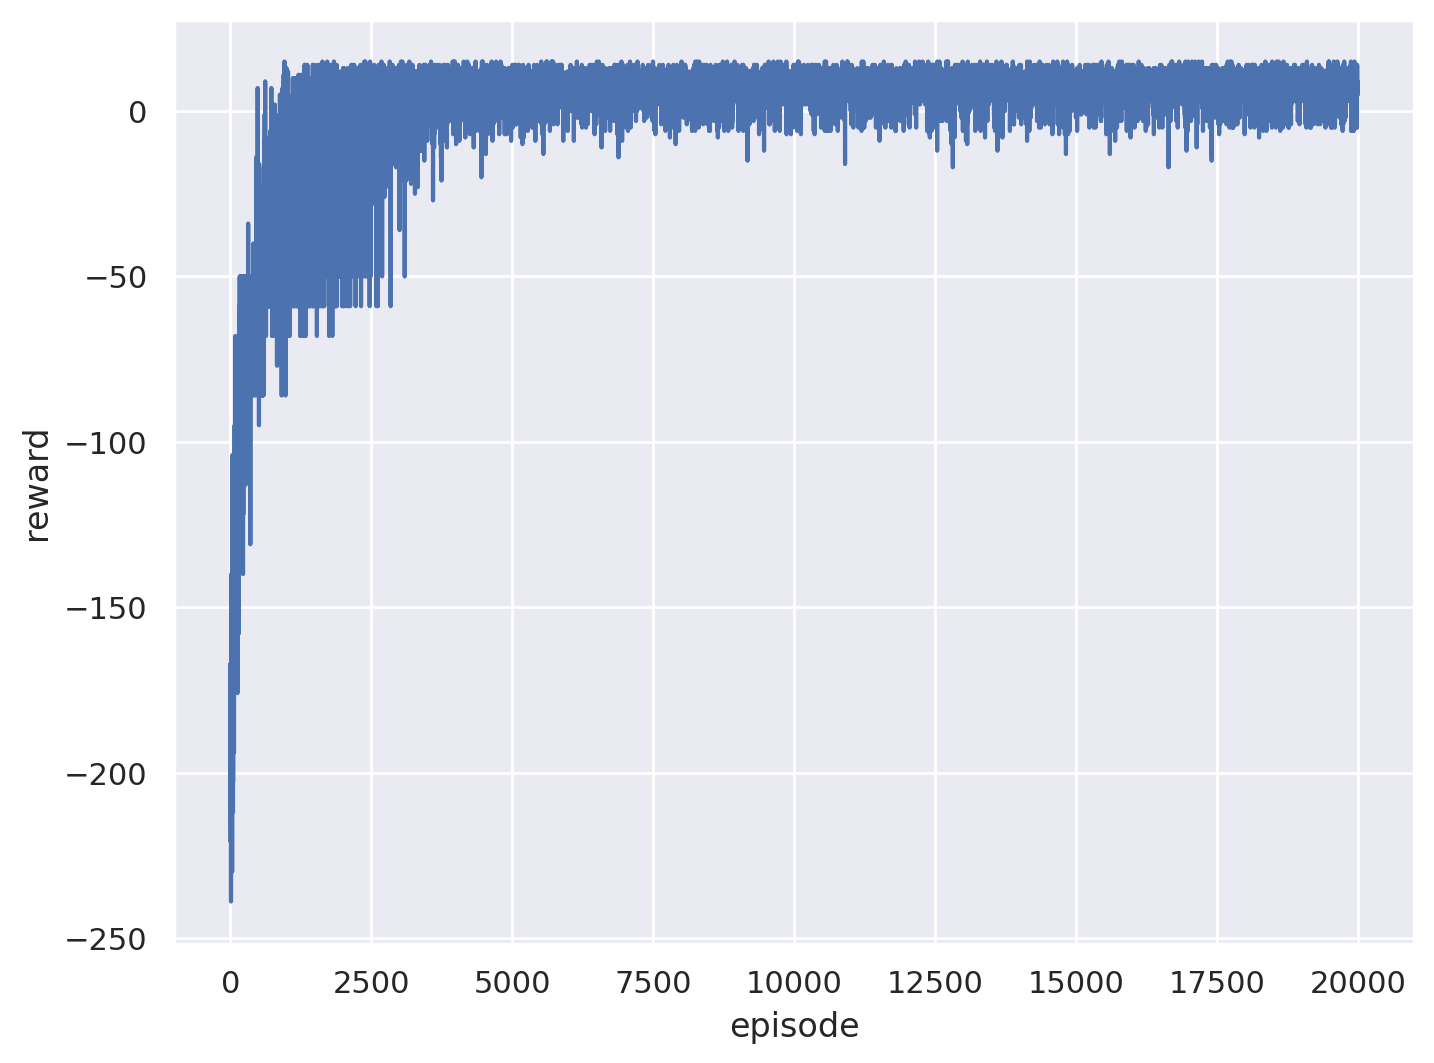

In [15]:
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(training_rewards)
plt.xlabel("episode")
plt.ylabel("reward")

Text(0, 0.5, 'penalties')

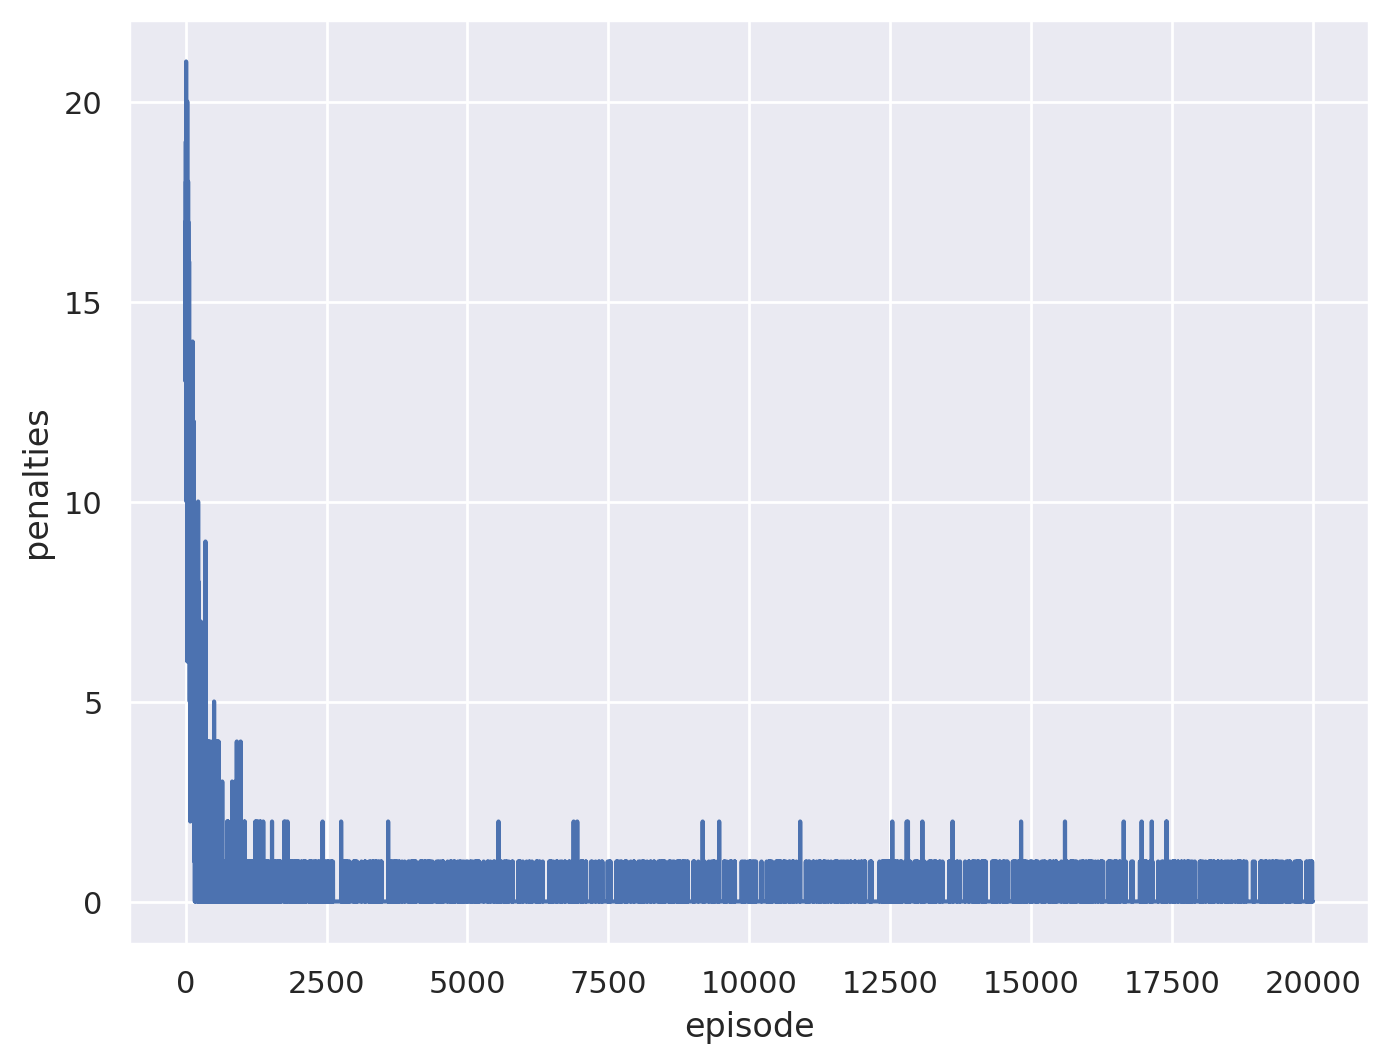

In [16]:
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(all_penalties)
plt.xlabel("episode")
plt.ylabel("penalties")

Text(0, 0.5, 'cnt_epochs')

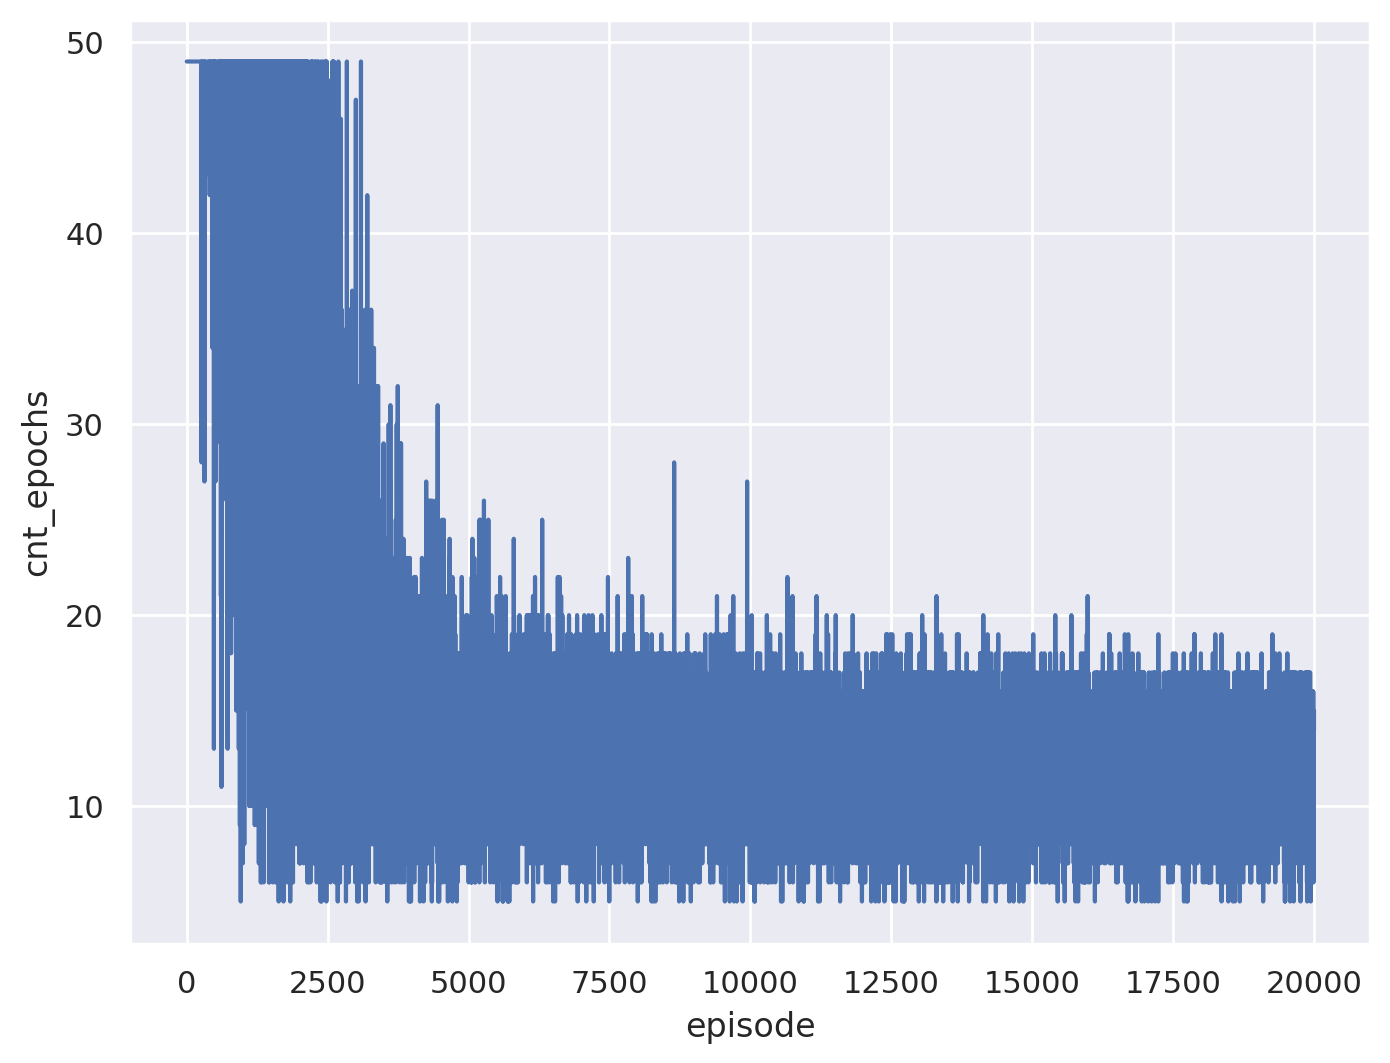

In [17]:
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(all_epochs)
plt.xlabel("episode")
plt.ylabel("cnt_epochs")

## Q TABLE AFTER LEARNING

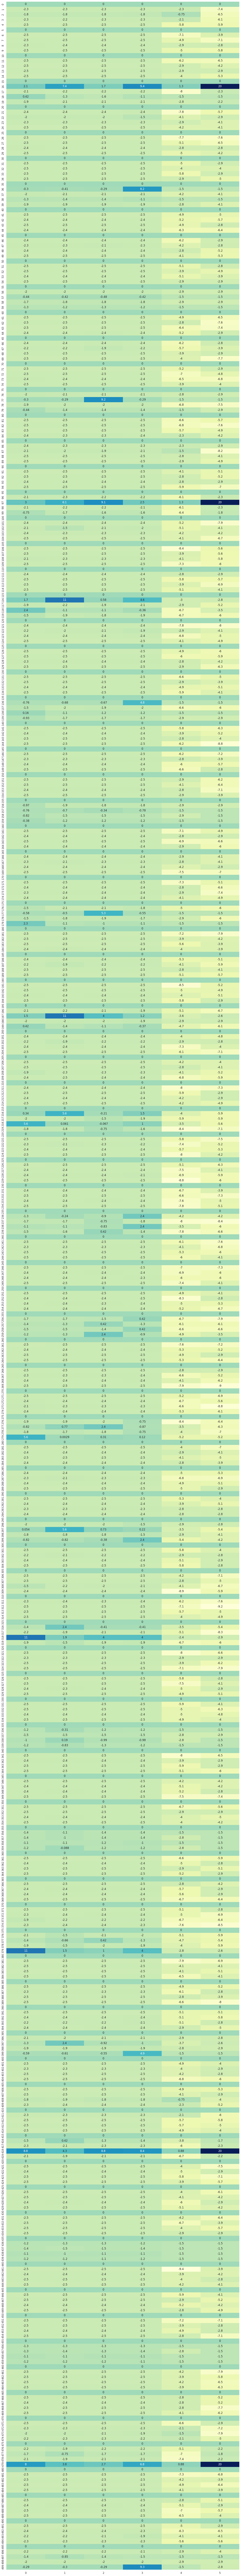

In [18]:
fig_dims = (18, 200)

fig, ax = plt.subplots(figsize=fig_dims)



ax = sns.heatmap(Q ,annot=True, cmap="YlGnBu",ax=ax,cbar=False)

#ax = sns.heatmap(Q ,annot=True, cmap="YlGnBu",ax=ax,cbar_kws={'label': 'color', 'orientation': 'horizontal'})

In [19]:
Q.shape

(500, 6)

## DISPLAY AND EVALUATE AGENT'S PERFORMANCE AFTER Q-LEARNING

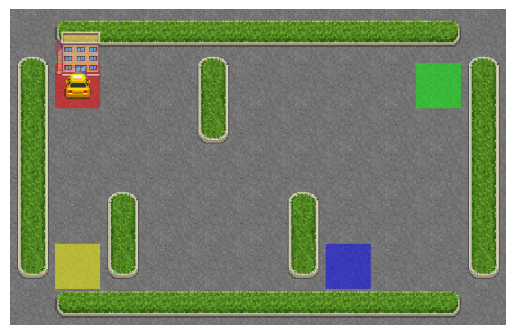

Episode: 19999/19999
Epoch: 18/18
State: 0
Action: 5
Reward: 3


In [20]:
test_rewards = []   # list of rewards
test_penalties = []
test_epochs = []


total_epochs, total_penalties,cumulative_test_rewards,total_without_result = 0, 0, 0, 0
experience_buffer = []
store_gif = True


for _ in range(test_episodes):
    state = env.reset()[0]
    epochs, penalties, cum_reward = 0, 0, 0
    
    for step in range(max_steps):
        action = np.argmax(Q[state])
        state, reward, done, info1,info2 = env.step(action)

        cum_reward+= reward
        
        if reward == -10:
            penalties += 1

        epochs += 1
        
        if _ < display_episodes:
            clear()

            experience_buffer.append({
                'frame': env.render(),
                'episode': episode,
                'epoch': epochs,
                'state': state,
                'action': action,
                'reward': cum_reward
                }
            )
            
            
        if done == True:
            break    
    
    test_rewards.append(cum_reward)
    
    cumulative_test_rewards += cum_reward
    total_penalties += penalties
    total_epochs += epochs
    total_without_result += 0 if done == True else 1

if store_gif:
   store_episode_as_gif(experience_buffer)
  
# Run animation and print output
run_animation(experience_buffer)   

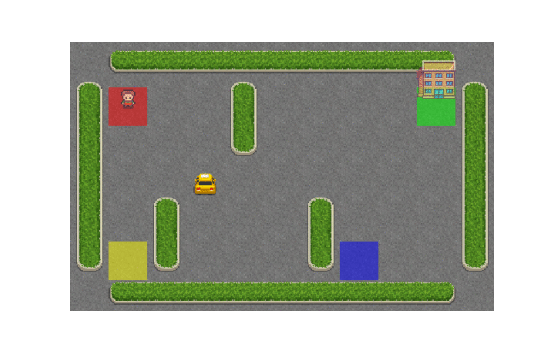

In [21]:
from IPython.display import Image, display
display(Image(filename='tax_3.gif'))

## RESULTS

In [22]:
print(f"Results after {test_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / test_episodes}")
print(f"Average penalties per episode: {total_penalties / test_episodes}")
print(f"Total reward for {test_episodes} episode: {cumulative_test_rewards}")
print(f"Average reward    per episode: {cumulative_test_rewards / test_episodes}")
print(f"% without result during max {max_steps} step : {100*total_without_result / test_episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.72
Average penalties per episode: 0.0
Total reward for 100 episode: 828
Average reward    per episode: 8.28
% without result during max 50 step : 0.0


Text(0, 0.5, 'reward')

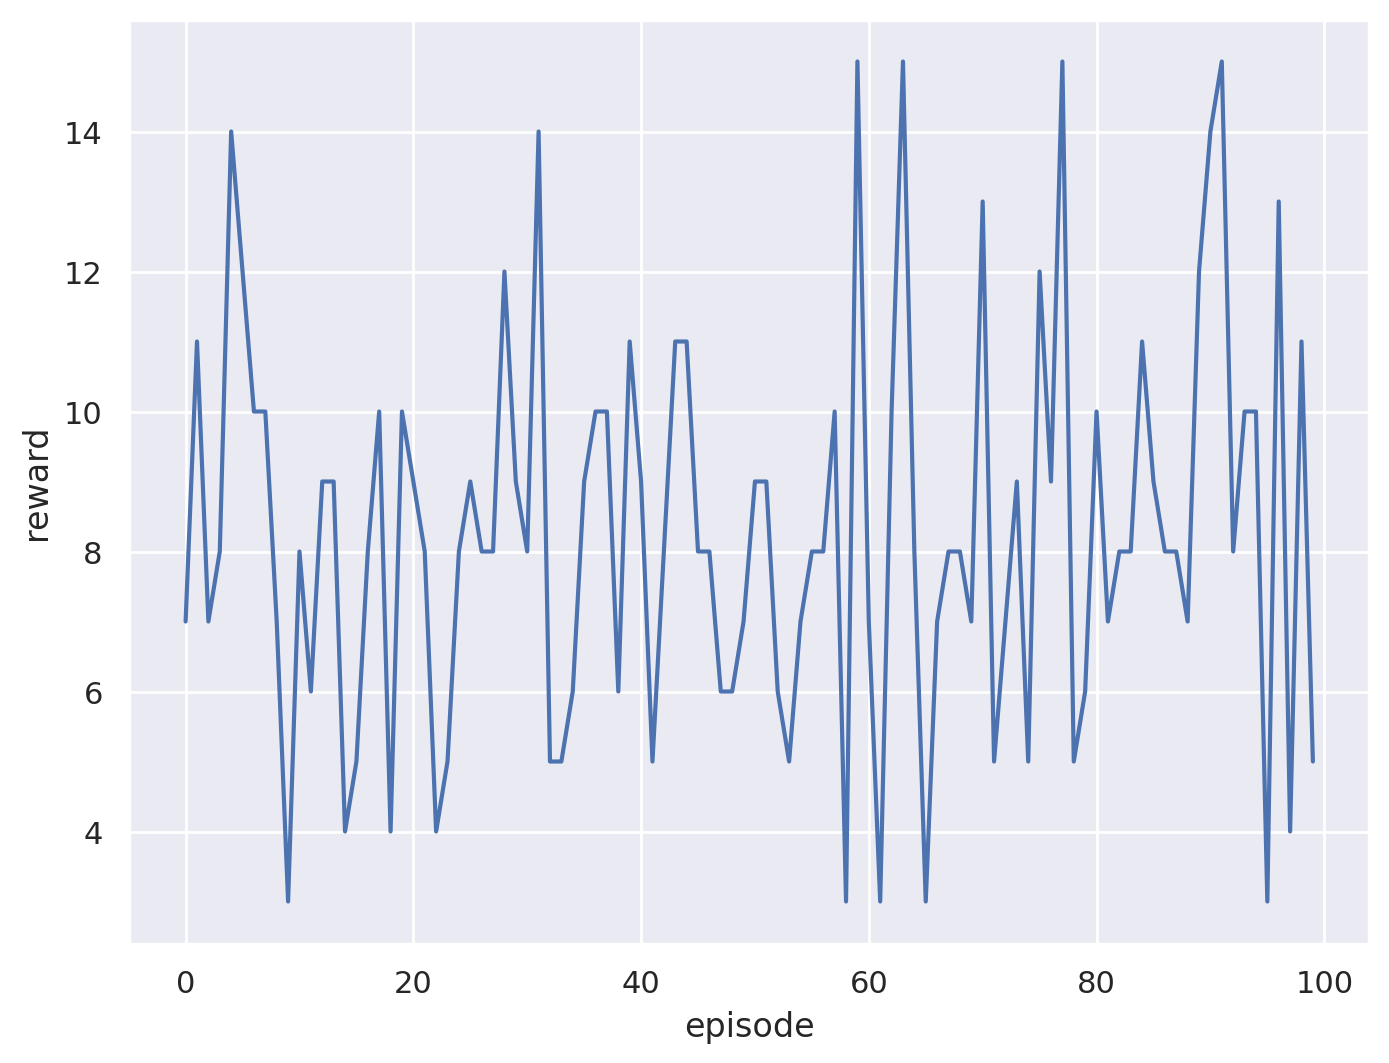

In [23]:
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
plt.plot(test_rewards)
plt.xlabel("episode")
plt.ylabel("reward")